In [1]:
import sys
sys.path.append('./src')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from icecream import ic
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
  
from src.data import load_data_part1
from src.eval import print_score

In [2]:
X, y = load_data_part1()
def create_n_sentence(y, n):
    """
    
    """
    prev_y_value = y[0]
    bloc_list = []
    current_bloc = []
    current_bloc_length = 0

    for idx in range(len(y)):
        if current_bloc_length < n:
            current_bloc_length += 1
            if prev_y_value == y[idx]:
                current_bloc.append(idx)
            else:
                bloc_list.append(current_bloc)
                current_bloc = [idx]
                current_bloc_length = 1
        else:
            bloc_list.append(current_bloc)
            current_bloc = [idx]
            current_bloc_length = 1
        prev_y_value = y[idx]
    bloc_list.append(current_bloc)
    return bloc_list
    
nested_idx = create_n_sentence(y, 2)
nested_idx[0:5], y[0:14]

([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]],
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1]))

In [3]:
def create_nested_dataset(X, y, n):
    def merge_string(l):
        s = ""
        for i in l:
            s += i
        return s
    
    new_X = []
    new_y = []
    nested_idx = create_n_sentence(y, n)
    for idx_list in nested_idx:
        new_X.append(merge_string(X[idx_list]))
        new_y.append(y[idx_list[0]])
    return new_X, new_y, nested_idx

nested_X, nested_y, nested_idx = create_nested_dataset(X, y, 2)
nested_X[0], X[nested_idx[0]], nested_y[0]

(" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n",
 array([" Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.\n",
        " D'abord merci de cet exceptionnel accueil que les Congolais, les Brazavillois, nous ont réservé cet après-midi.\n"],
       dtype='<U2530'),
 1)

In [4]:
d = joblib.load("./part1_speaker_recognition/gridsearch/results/part1_hrscv_LogisticRegression.pkl")

nested_X, nested_y, nested_idx = create_nested_dataset(X, y, 2)
X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
print(y_train)
y_hat = pipeline.predict(X_test)

100%|██████████| 21687/21687 [00:03<00:00, 5838.75it/s]


[-1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 

100%|██████████| 7229/7229 [00:01<00:00, 5915.93it/s]


In [5]:
print_score(y_test, y_hat, "oui")


    oui :
    =====
    Macro F1-score : 0.8546823631956539
    Micro F1-score : 0.9282058375985613
    Macro ROC-AUC: 0.870229432057389
    Weighted ROC-AUC: 0.870229432057389
    Classification report :
                  precision    recall  f1-score   support

          -1       0.72      0.79      0.75       992
           1       0.97      0.95      0.96      6237

    accuracy                           0.93      7229
   macro avg       0.84      0.87      0.85      7229
weighted avg       0.93      0.93      0.93      7229

    =====
    


{'-1': {'precision': 0.7159817351598173,
  'recall': 0.7903225806451613,
  'f1-score': 0.7513176808816482,
  'support': 992},
 '1': {'precision': 0.9660906423214868,
  'recall': 0.9501362834696168,
  'f1-score': 0.9580470455096597,
  'support': 6237},
 'accuracy': 0.9282058375985613,
 'macro avg': {'precision': 0.8410361887406521,
  'recall': 0.870229432057389,
  'f1-score': 0.8546823631956539,
  'support': 7229},
 'weighted avg': {'precision': 0.931769431102179,
  'recall': 0.9282058375985613,
  'f1-score': 0.9296785948648973,
  'support': 7229},
 'macro_auc': 0.870229432057389,
 'micro_auc': 0.870229432057389}

In [6]:
nested_X, nested_y, _ = create_nested_dataset(X, y, 3)
X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print_score(y_test, y_hat, "oui")

100%|██████████| 4851/4851 [00:01<00:00, 4469.77it/s]



    oui :
    =====
    Macro F1-score : 0.8731953692197936
    Micro F1-score : 0.9393939393939394
    Macro ROC-AUC: 0.8774552473087958
    Weighted ROC-AUC: 0.8774552473087958
    Classification report :
                  precision    recall  f1-score   support

          -1       0.77      0.79      0.78       664
           1       0.97      0.96      0.96      4187

    accuracy                           0.94      4851
   macro avg       0.87      0.88      0.87      4851
weighted avg       0.94      0.94      0.94      4851

    =====
    


{'-1': {'precision': 0.7712609970674487,
  'recall': 0.7921686746987951,
  'f1-score': 0.7815750371471025,
  'support': 664},
 '1': {'precision': 0.9668985368193811,
  'recall': 0.9627418199187963,
  'f1-score': 0.9648157012924845,
  'support': 4187},
 'accuracy': 0.9393939393939394,
 'macro avg': {'precision': 0.8690797669434149,
  'recall': 0.8774552473087958,
  'f1-score': 0.8731953692197936,
  'support': 4851},
 'weighted avg': {'precision': 0.9401198671852267,
  'recall': 0.9393939393939394,
  'f1-score': 0.9397339035203688,
  'support': 4851},
 'macro_auc': 0.8774552473087958,
 'micro_auc': 0.8774552473087958}

In [7]:
nested_X, nested_y, _ = create_nested_dataset(X, y, 4)
X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print_score(y_test, y_hat, "oui")

100%|██████████| 3664/3664 [00:01<00:00, 3397.49it/s]



    oui :
    =====
    Macro F1-score : 0.9015668509101904
    Micro F1-score : 0.9530567685589519
    Macro ROC-AUC: 0.9029032247954141
    Weighted ROC-AUC: 0.9029032247954141
    Classification report :
                  precision    recall  f1-score   support

          -1       0.83      0.83      0.83       505
           1       0.97      0.97      0.97      3159

    accuracy                           0.95      3664
   macro avg       0.90      0.90      0.90      3664
weighted avg       0.95      0.95      0.95      3664

    =====
    


{'-1': {'precision': 0.8271119842829077,
  'recall': 0.8336633663366336,
  'f1-score': 0.8303747534516764,
  'support': 505},
 '1': {'precision': 0.9733755942947702,
  'recall': 0.9721430832541944,
  'f1-score': 0.9727589483687045,
  'support': 3159},
 'accuracy': 0.9530567685589519,
 'macro avg': {'precision': 0.9002437892888389,
  'recall': 0.9029032247954141,
  'f1-score': 0.9015668509101904,
  'support': 3664},
 'weighted avg': {'precision': 0.9532164449890959,
  'recall': 0.9530567685589519,
  'f1-score': 0.9531344891893652,
  'support': 3664},
 'macro_auc': 0.9029032247954141,
 'micro_auc': 0.9029032247954141}

100%|██████████| 2951/2951 [00:00<00:00, 3137.44it/s]


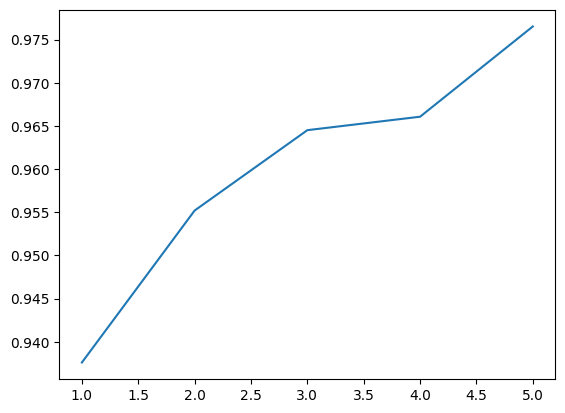

In [8]:
score_list = []
param_list = []
for i in range(1, 6):
    nested_X, nested_y, _ = create_nested_dataset(X, y, i)
    X_train, X_test, y_train, y_test = train_test_split(nested_X, nested_y)
    pipeline = d.best_estimator_
    pipeline.fit(X_train, y_train)
    y_hat = pipeline.predict(X_test)
    score_list.append(f1_score(y_test, y_hat))
    param_list.append(i)
plt.plot(param_list, score_list)

Ca marche bien mais on triche dans le train test split

In [9]:
def unnest_result(y_hat_nested, nested_idx):
    """
    Unnest un y_hat nested pour pouvoir l'utiliser avec un y_true non nested
    """
    l = []
    for i, idx_list in enumerate(nested_idx):
        for _ in idx_list:
            l.append(y_hat_nested[i])
    return l

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
score_list = []
param_list = []

# Baseline 
pipeline = d.best_estimator_
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
score_list.append(f1_score(y_test, y_hat, pos_label=-1))
param_list.append(i)

for i in range(1, 10):
    nested_X_train, nested_y_train, _  = create_nested_dataset(X_train, y_train, i)
    nested_X_test, nested_y_test, nested_idx = create_nested_dataset(X_test, [1 for i in range(len(X_test))], i) # sans regarder les y 


    pipeline = d.best_estimator_
    pipeline.fit(nested_X_train, nested_y_train)
    y_hat_nested = pipeline.predict(nested_X_test)
    
    y_hat = unnest_result(y_hat_nested, nested_idx)
    print_score(y_test, y_hat, f'n = {i}')
    score_list.append(f1_score(y_test, y_hat, pos_label=-1))
    param_list.append(i)

# plt.plot(param_list, score_list)

100%|██████████| 14354/14354 [00:01<00:00, 13259.09it/s]



    n = 1 :
    =====
    Macro F1-score : 0.7700741699789443
    Micro F1-score : 0.886860805350425
    Macro ROC-AUC: 0.7921849748240133
    Weighted ROC-AUC: 0.7921849748240133
    Classification report :
                  precision    recall  f1-score   support

          -1       0.56      0.66      0.61      1883
           1       0.95      0.92      0.93     12471

    accuracy                           0.89     14354
   macro avg       0.75      0.79      0.77     14354
weighted avg       0.90      0.89      0.89     14354

    =====
    


100%|██████████| 7177/7177 [00:00<00:00, 7201.35it/s]



    n = 2 :
    =====
    Macro F1-score : 0.6588465781821105
    Micro F1-score : 0.8442942733732758
    Macro ROC-AUC: 0.6590257214049393
    Weighted ROC-AUC: 0.6590257214049393
    Classification report :
                  precision    recall  f1-score   support

          -1       0.41      0.41      0.41      1883
           1       0.91      0.91      0.91     12471

    accuracy                           0.84     14354
   macro avg       0.66      0.66      0.66     14354
weighted avg       0.84      0.84      0.84     14354

    =====
    


100%|██████████| 4785/4785 [00:01<00:00, 4779.14it/s]



    n = 3 :
    =====
    Macro F1-score : 0.600177333318146
    Micro F1-score : 0.8439459384143793
    Macro ROC-AUC: 0.5878114336253204
    Weighted ROC-AUC: 0.5878114336253204
    Classification report :
                  precision    recall  f1-score   support

          -1       0.36      0.24      0.29      1883
           1       0.89      0.94      0.91     12471

    accuracy                           0.84     14354
   macro avg       0.62      0.59      0.60     14354
weighted avg       0.82      0.84      0.83     14354

    =====
    


100%|██████████| 3589/3589 [00:01<00:00, 3329.86it/s]



    n = 4 :
    =====
    Macro F1-score : 0.5609644543246143
    Micro F1-score : 0.8546049881566113
    Macro ROC-AUC: 0.5513373714218262
    Weighted ROC-AUC: 0.5513373714218262
    Classification report :
                  precision    recall  f1-score   support

          -1       0.36      0.14      0.20      1883
           1       0.88      0.96      0.92     12471

    accuracy                           0.85     14354
   macro avg       0.62      0.55      0.56     14354
weighted avg       0.81      0.85      0.83     14354

    =====
    


100%|██████████| 2871/2871 [00:00<00:00, 2872.18it/s]



    n = 5 :
    =====
    Macro F1-score : 0.5229553307886231
    Micro F1-score : 0.8575310018113419
    Macro ROC-AUC: 0.5259683932469479
    Weighted ROC-AUC: 0.5259683932469479
    Classification report :
                  precision    recall  f1-score   support

          -1       0.32      0.08      0.12      1883
           1       0.87      0.98      0.92     12471

    accuracy                           0.86     14354
   macro avg       0.60      0.53      0.52     14354
weighted avg       0.80      0.86      0.82     14354

    =====
    


100%|██████████| 2393/2393 [00:00<00:00, 2408.16it/s]



    n = 6 :
    =====
    Macro F1-score : 0.5089248948831288
    Micro F1-score : 0.8626863592030096
    Macro ROC-AUC: 0.5190158853085095
    Weighted ROC-AUC: 0.5190158853085095
    Classification report :
                  precision    recall  f1-score   support

          -1       0.35      0.05      0.09      1883
           1       0.87      0.98      0.93     12471

    accuracy                           0.86     14354
   macro avg       0.61      0.52      0.51     14354
weighted avg       0.80      0.86      0.82     14354

    =====
    


100%|██████████| 2051/2051 [00:00<00:00, 2226.49it/s]



    n = 7 :
    =====
    Macro F1-score : 0.4893590784289729
    Micro F1-score : 0.8644977009892713
    Macro ROC-AUC: 0.5094625904908735
    Weighted ROC-AUC: 0.5094625904908735
    Classification report :
                  precision    recall  f1-score   support

          -1       0.32      0.03      0.05      1883
           1       0.87      0.99      0.93     12471

    accuracy                           0.86     14354
   macro avg       0.59      0.51      0.49     14354
weighted avg       0.80      0.86      0.81     14354

    =====
    


100%|██████████| 1795/1795 [00:00<00:00, 1968.89it/s]



    n = 8 :
    =====
    Macro F1-score : 0.4806624406646647
    Micro F1-score : 0.8661697087919744
    Macro ROC-AUC: 0.5059160087302701
    Weighted ROC-AUC: 0.5059160087302701
    Classification report :
                  precision    recall  f1-score   support

          -1       0.32      0.02      0.03      1883
           1       0.87      0.99      0.93     12471

    accuracy                           0.87     14354
   macro avg       0.59      0.51      0.48     14354
weighted avg       0.80      0.87      0.81     14354

    =====
    


100%|██████████| 1595/1595 [00:00<00:00, 1693.58it/s]



    n = 9 :
    =====
    Macro F1-score : 0.4760864641898325
    Micro F1-score : 0.8670057126933259
    Macro ROC-AUC: 0.5041427178499686
    Weighted ROC-AUC: 0.5041427178499686
    Classification report :
                  precision    recall  f1-score   support

          -1       0.32      0.01      0.02      1883
           1       0.87      1.00      0.93     12471

    accuracy                           0.87     14354
   macro avg       0.59      0.50      0.48     14354
weighted avg       0.80      0.87      0.81     14354

    =====
    


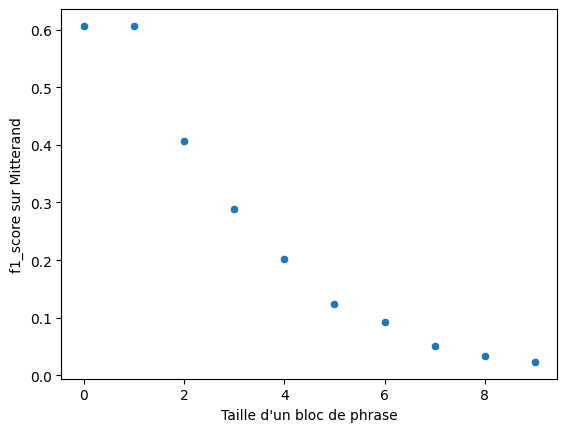

In [13]:
df = pd.DataFrame({
    "Taille d'un bloc de phrase": param_list,
    "f1_score sur Mitterand": score_list
})
sns.scatterplot(data=df, x="Taille d'un bloc de phrase", y="f1_score sur Mitterand") # performance en test des bloc de phrase.
plt.savefig('final_report/n-sentence_bloc_perf.png')